In [221]:
import pandas as pd
import warnings
warnings.filterwarnings('ignore')
import random
import matplotlib.pyplot as plt
%matplotlib inline
import numpy as np
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn import metrics
from sklearn.metrics import confusion_matrix
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score
from sklearn.metrics import roc_auc_score,r2_score,classification_report

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

from sklearn.tree import DecisionTreeClassifier


1.a Read ‘TelcomCustomer-Churn_1.csv’ as a DataFrame and assign it to a variable
1.b Read ‘TelcomCustomer-Churn_2.csv’ as a DataFrame and assign it to a variable

In [222]:
churn1=pd.read_csv(r'C:\Personal\AI\Ensemble\TelcomCustomer-Churn_1.csv')

In [223]:
churn2=pd.read_csv(r'C:\Personal\AI\Ensemble\TelcomCustomer-Churn_2.csv')

In [224]:
churn1.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No


In [225]:
churn2.head()

,customerID,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Yes,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,No,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Yes,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,No,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,No,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1 c.Merge both the DataFrames on key ‘customerID’ to form
a single DataFrame

In [226]:
churn = pd.merge(churn1, churn2, on="customerID")

In [227]:
churn1.shape

(7043, 10)

In [228]:
churn2.shape

(7043, 12)

In [229]:
churn.shape

(7043, 21)

In [230]:
churn.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


1 d.Verify if all the columns are incorporated in the merged
DataFrame by using simple comparisonOperator in Python

In [231]:
col_df1 = (len(churn2.columns)+len(churn1.columns))-1
col_df2=len(churn.columns)
if col_df1==col_df2:
    if churn2.shape[0]==churn1.shape[0]:
        if churn.shape[0]==churn2.shape[0]:
            print("Merge is Successful")

Merge is Successful


churn1 have row=7043 column= 10 and churn2 have row=7043 and column=12 So the resulted churn should have same row count and column count should be one less which is 21, as we merge based on column ID 
Even compare shows the same

2 a Impute missing/unexpected values in the DataFrame

In [232]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7043 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7043 non-null   object 
 1   gender            7043 non-null   object 
 2   SeniorCitizen     7043 non-null   int64  
 3   Partner           7043 non-null   object 
 4   Dependents        7043 non-null   object 
 5   tenure            7043 non-null   int64  
 6   PhoneService      7043 non-null   object 
 7   MultipleLines     7043 non-null   object 
 8   InternetService   7043 non-null   object 
 9   OnlineSecurity    7043 non-null   object 
 10  OnlineBackup      7043 non-null   object 
 11  DeviceProtection  7043 non-null   object 
 12  TechSupport       7043 non-null   object 
 13  StreamingTV       7043 non-null   object 
 14  StreamingMovies   7043 non-null   object 
 15  Contract          7043 non-null   object 
 16  PaperlessBilling  7043 non-null   object 


In [233]:
for column in churn:
    print(column)
    print(churn[column].unique())
    print("   ")


customerID
['7590-VHVEG' '5575-GNVDE' '3668-QPYBK' ... '4801-JZAZL' '8361-LTMKD'
 '3186-AJIEK']
   
gender
['Female' 'Male']
   
SeniorCitizen
[0 1]
   
Partner
['Yes' 'No']
   
Dependents
['No' 'Yes']
   
tenure
[ 1 34  2 45  8 22 10 28 62 13 16 58 49 25 69 52 71 21 12 30 47 72 17 27
  5 46 11 70 63 43 15 60 18 66  9  3 31 50 64 56  7 42 35 48 29 65 38 68
 32 55 37 36 41  6  4 33 67 23 57 61 14 20 53 40 59 24 44 19 54 51 26  0
 39]
   
PhoneService
['No' 'Yes']
   
MultipleLines
['No phone service' 'No' 'Yes']
   
InternetService
['DSL' 'Fiber optic' 'No']
   
OnlineSecurity
['No' 'Yes' 'No internet service']
   
OnlineBackup
['Yes' 'No' 'No internet service']
   
DeviceProtection
['No' 'Yes' 'No internet service']
   
TechSupport
['No' 'Yes' 'No internet service']
   
StreamingTV
['No' 'Yes' 'No internet service']
   
StreamingMovies
['No' 'Yes' 'No internet service']
   
Contract
['Month-to-month' 'One year' 'Two year']
   
PaperlessBilling
['Yes' 'No']
   
PaymentMethod
['Electroni

In [234]:
churn.replace('No internet service','No', inplace=True)
churn.replace('No phone service','No', inplace=True)

In [235]:
churn['TotalCharges'] = pd.to_numeric(churn['TotalCharges'], errors='coerce')

In [236]:
churn[churn['TotalCharges'].isnull()]

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
488,4472-LVYGI,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,Yes,Bank transfer (automatic),52.55,NaN,No
753,3115-CZMZD,Male,0,No,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.25,NaN,No
936,5709-LVOEQ,Female,0,Yes,Yes,0,Yes,No,DSL,Yes,...,Yes,No,Yes,Yes,Two year,No,Mailed check,80.85,NaN,No
1082,4367-NUYAO,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.75,NaN,No
1340,1371-DWPAZ,Female,0,Yes,Yes,0,No,No,DSL,Yes,...,Yes,Yes,Yes,No,Two year,No,Credit card (automatic),56.05,NaN,No
3331,7644-OMVMY,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,19.85,NaN,No
3826,3213-VVOLG,Male,0,Yes,Yes,0,Yes,Yes,No,No,...,No,No,No,No,Two year,No,Mailed check,25.35,NaN,No
4380,2520-SGTTA,Female,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,Two year,No,Mailed check,20.00,NaN,No
5218,2923-ARZLG,Male,0,Yes,Yes,0,Yes,No,No,No,...,No,No,No,No,One year,Yes,Mailed check,19.70,NaN,No
6670,4075-WKNIU,Female,0,Yes,Yes,0,Yes,Yes,DSL,No,...,Yes,Yes,Yes,No,Two year,No,Mailed check,73.35,NaN,No


Tenure=0 for all values ,Monthly charges are given but Total charges are not calcuted , any value replaced will be incorrect So dropping these columns


In [237]:
churn.dropna(inplace=True)

In [238]:
churn.shape

(7032, 21)

In [239]:
ReplacePaymentname={'Electronic check' :'E-check','Mailed check' :'M-check','Bank transfer (automatic)':'Bank transfer',
 'Credit card (automatic)':'Credit card'}
churn['PaymentMethod'].replace(ReplacePaymentname, inplace=True)

In [240]:
churn['PaymentMethod'].unique()

array(['E-check', 'M-check', 'Bank transfer', 'Credit card'], dtype=object)

In [241]:
churn.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7032 entries, 0 to 7042
Data columns (total 21 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customerID        7032 non-null   object 
 1   gender            7032 non-null   object 
 2   SeniorCitizen     7032 non-null   int64  
 3   Partner           7032 non-null   object 
 4   Dependents        7032 non-null   object 
 5   tenure            7032 non-null   int64  
 6   PhoneService      7032 non-null   object 
 7   MultipleLines     7032 non-null   object 
 8   InternetService   7032 non-null   object 
 9   OnlineSecurity    7032 non-null   object 
 10  OnlineBackup      7032 non-null   object 
 11  DeviceProtection  7032 non-null   object 
 12  TechSupport       7032 non-null   object 
 13  StreamingTV       7032 non-null   object 
 14  StreamingMovies   7032 non-null   object 
 15  Contract          7032 non-null   object 
 16  PaperlessBilling  7032 non-null   object 


In [242]:
churn.describe()

,SeniorCitizen,tenure,MonthlyCharges,TotalCharges
count,7032.000000,7032.000000,7032.000000,7032.000000
mean,0.162400,32.421786,64.798208,2283.300441
std,0.368844,24.545260,30.085974,2266.771362
min,0.000000,1.000000,18.250000,18.800000
25%,0.000000,9.000000,35.587500,401.450000
50%,0.000000,29.000000,70.350000,1397.475000
75%,0.000000,55.000000,89.862500,3794.737500
max,1.000000,72.000000,118.750000,8684.800000


2 c Create a function that will accept a DataFrame as input
and return pie-charts for all theappropriate Categorical
features. Clearly show percentage distribution in the
pie-chart

In [243]:

def pie_charts(df):
    # Get the categorical columns from the DataFrame
    categorical_columns = df.select_dtypes(include='object').columns

    # Generate pie charts for each categorical feature
    for column in categorical_columns:
        # Count the frequency of each category
        category_counts = df[column].value_counts()

        # Calculate the percentage distribution
        category_percentages = category_counts / category_counts.sum() * 100

        # Create a pie chart
        plt.figure(figsize=(3, 3))
        plt.pie(category_counts, labels=category_counts.index, autopct='%1.1f%%')
        plt.title(f'Percentage Distribution - {column}')
        plt.axis('equal')
        plt.show()

Dropping Customer ID as it is not adding any value

In [244]:
churn.drop(columns=['customerID'], axis=1, inplace=True)

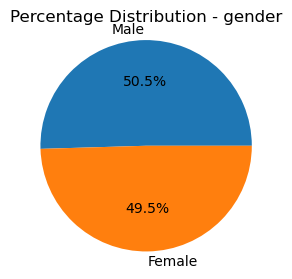

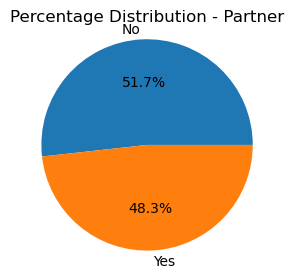

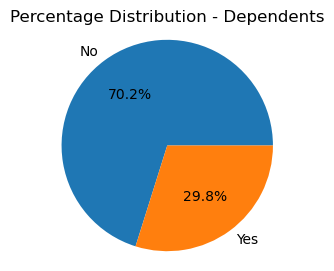

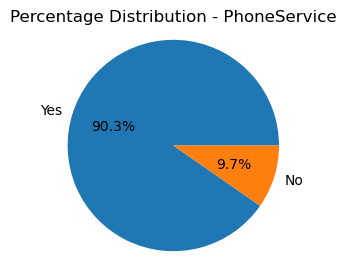

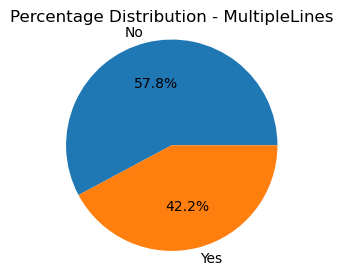

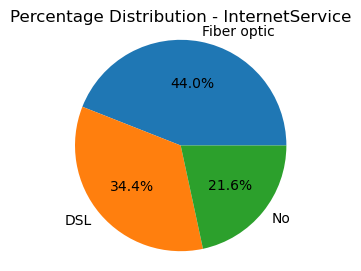

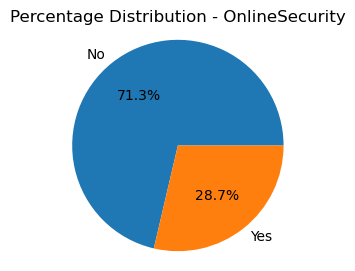

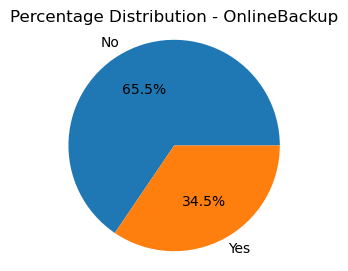

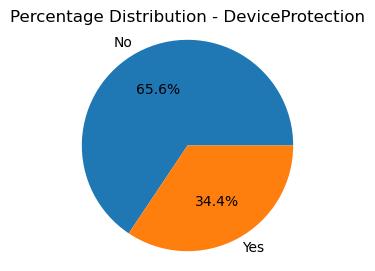

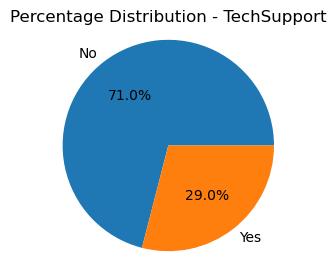

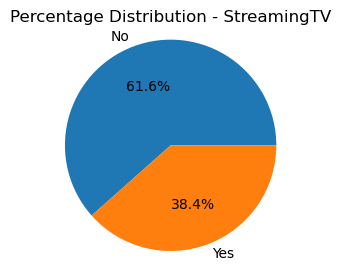

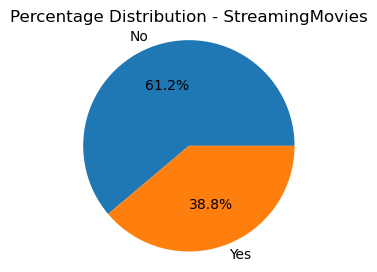

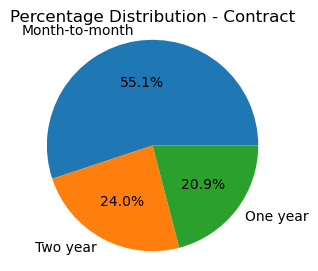

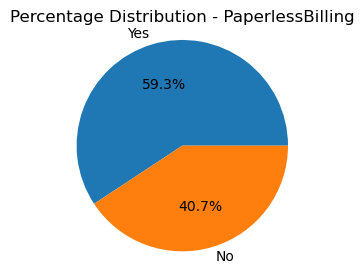

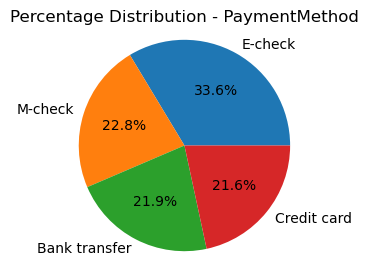

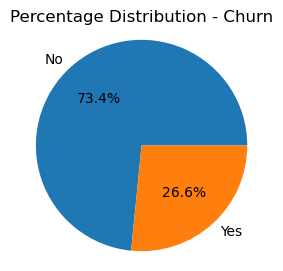

In [245]:
pie_charts(churn)

2 e.Encode all the appropriate Categorical features with the
best suitable approach

In [246]:
#churn_copy=churn.copy()
label_encoding_columns = ['gender', 'Partner', 'Dependents', 'PaperlessBilling', 'PhoneService', 'Churn']

for column in label_encoding_columns:
    if column == 'gender':
        churn[column] = churn[column].map({'Female': 1, 'Male': 0})
    else: 
        churn[column] = churn[column].map({'Yes': 1, 'No': 0}) 


In [247]:
one_hot_encoding_columns = ['MultipleLines', 'InternetService', 'OnlineSecurity', 'OnlineBackup', 'DeviceProtection', 
                            'TechSupport', 'StreamingTV',  'StreamingMovies', 'Contract', 'PaymentMethod']

churn = pd.get_dummies(churn, columns = one_hot_encoding_columns)

In [248]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_E-check,PaymentMethod_M-check
0,1,0,1,0,1,0,1,29.85,29.85,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,34,1,0,56.95,1889.50,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,2,1,1,53.85,108.15,1,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,45,0,0,42.30,1840.75,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,2,1,1,70.70,151.65,1,...,0,1,0,1,0,0,0,0,1,0


2 f.Split the data into 80% train and 20% test.

In [249]:
X = churn.drop(columns=['Churn'])
y = churn['Churn']

In [250]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20,
                                                    random_state=1)

2 g.Normalize/Standardize the data with the best suitable
approach


In [251]:
min_max_columns = ['tenure', 'MonthlyCharges', 'TotalCharges']

for column in min_max_columns:
        min_column = churn[column].min()
        max_column = churn[column].max()
        churn[column] = (churn[column] - min_column) / (max_column - min_column)   


In [252]:
churn.head()

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,...,StreamingTV_Yes,StreamingMovies_No,StreamingMovies_Yes,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer,PaymentMethod_Credit card,PaymentMethod_E-check,PaymentMethod_M-check
0,1,0,1,0,0.000000,0,1,0.115423,0.001275,0,...,0,1,0,1,0,0,0,0,1,0
1,0,0,0,0,0.464789,1,0,0.385075,0.215867,0,...,0,1,0,0,1,0,0,0,0,1
2,0,0,0,0,0.014085,1,1,0.354229,0.010310,1,...,0,1,0,1,0,0,0,0,0,1
3,0,0,0,0,0.619718,0,0,0.239303,0.210241,0,...,0,1,0,0,1,0,1,0,0,0
4,1,0,0,0,0.014085,1,1,0.521891,0.015330,1,...,0,1,0,1,0,0,0,0,1,0


churn.to_csv(r'C:\Personal\AI\Ensemble\TelcomChurn.csv')

3.a Train a model using Decision tree and check the
performance of the model on train and test data

In [253]:
from sklearn.tree import DecisionTreeClassifier

dTree = DecisionTreeClassifier(criterion = 'gini', random_state=1)
dTree.fit(X_train, y_train)

DecisionTreeClassifier(random_state=1)

In [254]:
print(dTree.score(X_train, y_train))
print(dTree.score(X_test, y_test))

y_pred = dTree.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.9976888888888888
0.7149964463397299
              precision    recall  f1-score   support

           0       0.82      0.79      0.80      1041
           1       0.46      0.51      0.48       366

    accuracy                           0.71      1407
   macro avg       0.64      0.65      0.64      1407
weighted avg       0.73      0.71      0.72      1407



0.6497220516212343

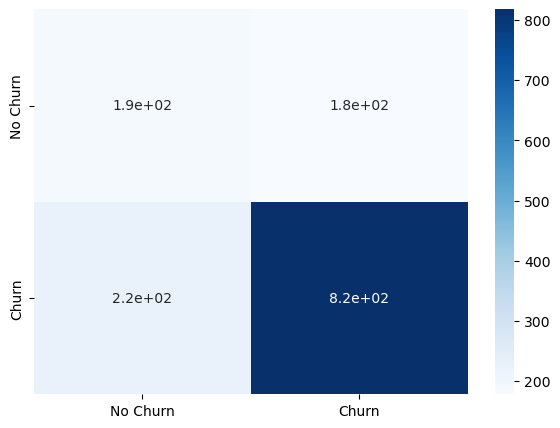

In [255]:
class_train_predict = dTree.predict(X_train)
class_test_predict = dTree.predict(X_test)
cm=confusion_matrix(y_test, class_test_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

In [256]:
print (pd.DataFrame(dTree.feature_importances_, columns = ["Imp"], index = X_train.columns))

                                  Imp
gender                       0.024957
SeniorCitizen                0.017680
Partner                      0.016509
Dependents                   0.015320
tenure                       0.131310
PhoneService                 0.003697
PaperlessBilling             0.018754
MonthlyCharges               0.198909
TotalCharges                 0.180469
MultipleLines_No             0.007694
MultipleLines_Yes            0.007650
InternetService_DSL          0.008765
InternetService_Fiber optic  0.050645
InternetService_No           0.000000
OnlineSecurity_No            0.009908
OnlineSecurity_Yes           0.011140
OnlineBackup_No              0.012436
OnlineBackup_Yes             0.010295
DeviceProtection_No          0.010176
DeviceProtection_Yes         0.007179
TechSupport_No               0.005932
TechSupport_Yes              0.009127
StreamingTV_No               0.003543
StreamingTV_Yes              0.008992
StreamingMovies_No           0.009838
StreamingMov

from sklearn.tree import export_graphviz

train_char_label = ['No', 'Yes']
Credit_Tree_File = open('credit_tree.dot','w')
dot_data = export_graphviz(dTree, out_file=Credit_Tree_File, feature_names = list(X_train), class_names = list(train_char_label))
Credit_Tree_File.close()

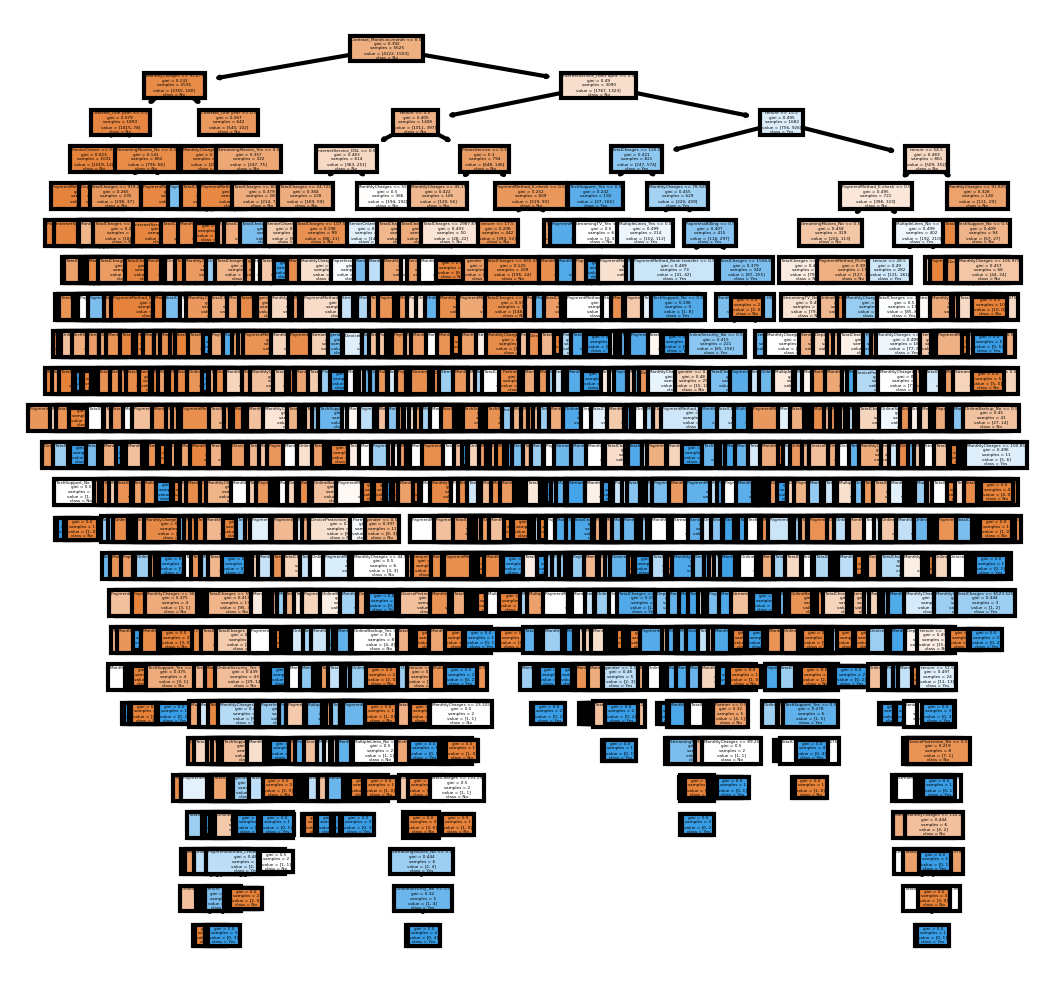

In [257]:

import matplotlib.pyplot as plt
from sklearn.tree import plot_tree

fn = list(X_train)
cn = ['No', 'Yes']
fig, axes = plt.subplots(nrows = 1,ncols = 1,figsize = (4, 4), dpi=300)
plot_tree(dTree, feature_names = fn, class_names=cn, filled = True)

fig.savefig('tree.png')

3.b Use grid search and improve the performance of the
Decision tree model , check the performance of the model on
train and test data , provide the differences observed in
performance in Q3.a and Q3.b


In [258]:
param_grid={
    "criterion":['gini','entropy'],
    "max_depth":range(1,10),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

from sklearn.model_selection import GridSearchCV
gs = GridSearchCV(dTree,param_grid,cv=10)

In [259]:
gs.fit(X_train, y_train)

GridSearchCV(cv=10, estimator=DecisionTreeClassifier(random_state=1),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': range(1, 10),
                         'min_samples_leaf': range(1, 5),
                         'min_samples_split': range(1, 10)})

In [260]:
print(gs.score(X_train, y_train))
print(gs.score(X_test, y_test))

y_pred = gs.predict(X_test)
print(classification_report(y_test, y_pred))
roc_auc_score(y_test, y_pred)

0.7909333333333334
0.7903340440653873
              precision    recall  f1-score   support

           0       0.81      0.93      0.87      1041
           1       0.67      0.39      0.49       366

    accuracy                           0.79      1407
   macro avg       0.74      0.66      0.68      1407
weighted avg       0.77      0.79      0.77      1407



0.660773058691989

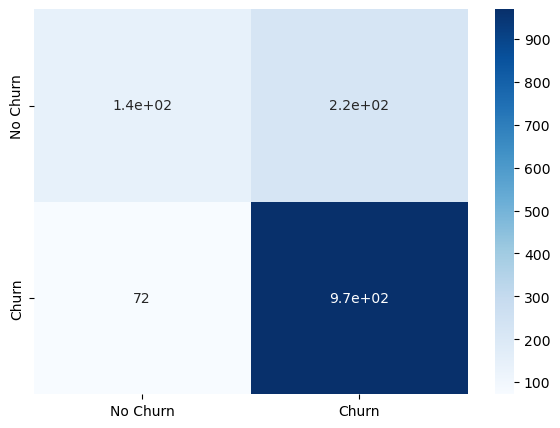

In [261]:
class_train_predict = gs.predict(X_train)
class_test_predict = gs.predict(X_test)
cm=confusion_matrix(y_test, class_test_predict,labels=[1,0])
df_cm = pd.DataFrame(cm, index = [i for i in ["No Churn","Churn"]],
                  columns = [i for i in ["No Churn","Churn"]])
plt.figure(figsize = (7,5))
sns.heatmap(df_cm, annot=True, cmap='Blues')
plt.show()

3.c Train a model using Random forest and check the
performance of the model on train and test data

In [262]:
churn.to_csv('C:\Personal\AI\Ensemble\TelcomChurn.csv')